<a href="https://colab.research.google.com/github/Rk-Pudasaini/Data_Analysis/blob/main/Kalimati_tarkari_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
#df = pd.read_csv('/content/Kalimati_Tarkari_Dataset.csv')
df = pd.read_csv('https://raw.githubusercontent.com/Rk-Pudasaini/Data_Analysis/main/Kalimati_Tarkari_Price_Analysis/Kalimati_Tarkari_Dataset.csv')
df.head()

<ipython-input-35-e75b8efb487e>:3: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/Rk-Pudasaini/Data_Analysis/main/Kalimati_Tarkari_Price_Analysis/Kalimati_Tarkari_Dataset.csv')


,Commodity,Date,Unit,Minimum,Maximum,Average
0,Tomato Big(Nepali),6/16/2013,Kg,35,40,37.5
1,Tomato Small(Local),6/16/2013,Kg,26,32,29.0
2,Potato Red,6/16/2013,Kg,20,21,20.5
3,Potato White,6/16/2013,Kg,15,16,15.5
4,Onion Dry (Indian),6/16/2013,Kg,28,30,29.0


In [36]:
df.tail()

,Commodity,Date,Unit,Minimum,Maximum,Average
280857,Tomato Small(Indian),9/28/2023,KG,Rs 45.00,Rs 55.00,Rs 50.00
280858,Tomato Small(Local),9/28/2023,KG,Rs 50.00,Rs 60.00,Rs 55.00
280859,Tomato Small(Tunnel),9/28/2023,KG,Rs 60.00,Rs 75.00,Rs 69.00
280860,Turnip A,9/28/2023,KG,Rs 70.00,Rs 80.00,Rs 75.00
280861,Water Melon(Green),9/28/2023,KG,Rs 50.00,Rs 60.00,Rs 56.67


In [37]:
df.shape

(280862, 6)

In [38]:
df.dtypes

Commodity    object
Date         object
Unit         object
Minimum      object
Maximum      object
Average      object
dtype: object

In [39]:
# Convert 'Minimum' column to numeric, removing 'Rs' if present
df['Minimum'] = pd.to_numeric(df['Minimum'].apply(lambda x: str(x).replace('Rs', '').strip()))
df['Maximum'] = pd.to_numeric(df['Maximum'].apply(lambda x: str(x).replace('Rs', '').strip()))
df['Average'] = pd.to_numeric(df['Average'].apply(lambda x: str(x).replace('Rs', '').strip()))

In [40]:
from dateutil import parser

# function to format the date columns in year-month-day type
def format_date(date):
    try:
        parsed_date = parser.parse(date)
        standardized_date = parsed_date.strftime("%Y-%m-%d")
        return standardized_date
    except Exception as e:
        return pd.NaT  # Return NaT (Not a Time) for invalid dates

# Apply the function to the 'Date' column
df['Date'] = df['Date'].apply(format_date).astype('datetime64[ns]')

In [41]:
df.dtypes

Commodity            object
Date         datetime64[ns]
Unit                 object
Minimum             float64
Maximum             float64
Average             float64
dtype: object

In [42]:
df.isna().sum()

Commodity    0
Date         0
Unit         0
Minimum      0
Maximum      0
Average      0
dtype: int64

In [43]:
df.shape

(280862, 6)

In [44]:
total_commodities = df['Commodity'].unique()

# Now total_commodities contains an array of unique commodity names
print(f'Total Number of Commodities sold in Kalimati tarkari bazar: {len(total_commodities)}')
print(total_commodities)


Total Number of Commodities sold in Kalimati tarkari bazar: 136
['Tomato Big(Nepali)' 'Tomato Small(Local)' 'Potato Red' 'Potato White'
 'Onion Dry (Indian)' 'Carrot(Local)' 'Cabbage(Local)' 'Cauli Local'
 'Raddish Red' 'Raddish White(Local)' 'Brinjal Long' 'Brinjal Round'
 'Cow pea(Long)' 'Green Peas' 'French Bean(Local)' 'Soyabean Green'
 'Bitter Gourd' 'Bottle Gourd' 'Pointed Gourd(Local)' 'Snake Gourd'
 'Smooth Gourd' 'Sponge Gourd' 'Pumpkin' 'Squash(Long)' 'Turnip' 'Okara'
 'Christophine' 'Brd Leaf Mustard' 'Spinach Leaf' 'Cress Leaf'
 'Mustard Leaf' 'Fenugreek Leaf' 'Onion Green' 'Mushroom(Kanya)'
 'Asparagus' 'Neuro' 'Brocauli' 'Sugarbeet' 'Drumstick' 'Red Cabbbage'
 'Lettuce' 'Celery' 'Parseley' 'Fennel Leaf' 'Mint' 'Turnip A' 'Tamarind'
 'Bamboo Shoot' 'Tofu' 'Gundruk' 'Apple(Jholey)' 'Banana' 'Lime'
 'Pomegranate' 'Mango(Maldah)' 'Grapes(Green)' 'Water Melon(Green)'
 'Sweet Orange' 'Pineapple' 'Cucumber(Local)' 'Jack Fruit'
 'Papaya(Nepali)' 'Sugarcane' 'Ginger' 'Chilli Dry' 

In [45]:
sorted_commodities = sorted(total_commodities)
print(sorted_commodities)

['Amla', 'Apple(Fuji)', 'Apple(Jholey)', 'Arum', 'Asparagus', 'Avocado', 'Bakula', 'Bamboo Shoot', 'Banana', 'Barela', 'Bauhania flower', 'Bitter Gourd', 'Bottle Gourd', 'Brd Leaf Mustard', 'Brinjal Long', 'Brinjal Round', 'Brocauli', 'Cabbage', 'Cabbage(Local)', 'Cabbage(Terai)', 'Capsicum', 'Carrot(Local)', 'Carrot(Terai)', 'Cauli Local', 'Cauli Local(Jyapu)', 'Cauli Terai', 'Celery', 'Chilli Dry', 'Chilli Green', 'Chilli Green(Akbare)', 'Chilli Green(Bullet)', 'Chilli Green(Machhe)', 'Christophine', 'Clive Dry', 'Clive Green', 'Coriander Green', 'Cow pea(Long)', 'Cowpea(Short)', 'Cress Leaf', 'Cucumber(Hybrid)', 'Cucumber(Local)', 'Drumstick', 'Fennel Leaf', 'Fenugreek Leaf', 'Fish Fresh', 'Fish Fresh(Bachuwa)', 'Fish Fresh(Chhadi)', 'Fish Fresh(Mungari)', 'Fish Fresh(Rahu)', 'French Bean(Hybrid)', 'French Bean(Local)', 'French Bean(Rajma)', 'Garlic Dry Chinese', 'Garlic Dry Nepali', 'Garlic Green', 'Ginger', 'Grapes(Black)', 'Grapes(Green)', 'Green Peas', 'Guava', 'Gundruk', 'Jack 

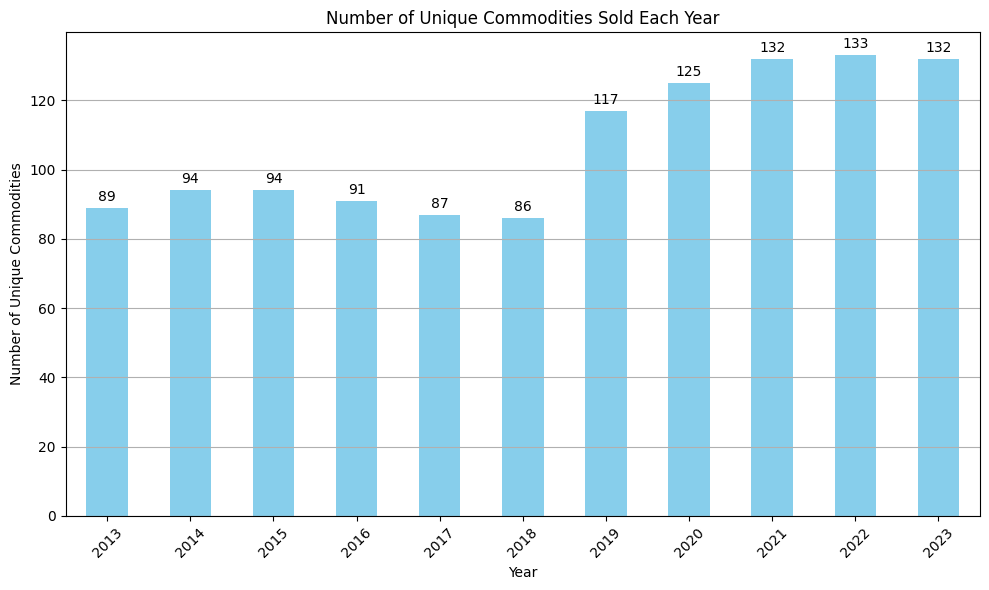

In [46]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by year and count the number of unique commodities sold each year
commodities_per_year = df.groupby(df['Date'].dt.year)['Commodity'].nunique()

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = commodities_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Commodities Sold Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Commodities')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines only on the y-axis

# Annotate each bar with its count value
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()),
                 ha='center', va='center',
                 size=10, xytext=(0, 8),
                 textcoords='offset points')

plt.tight_layout()
plt.show()


In 2022 there were 133 commodities but in 2023 there were only 132 commodities. Find the commoditieswhich is sold in 2022 but not in 2023.

In [47]:
# Group the data by year and get the set of unique commodities sold each year
commodities_2022 = set(df[df['Date'].dt.year == 2022]['Commodity'].unique())
commodities_2023 = set(df[df['Date'].dt.year == 2023]['Commodity'].unique())

# Find the commodity sold in 2022 but not in 2023
commodity_difference = commodities_2022 - commodities_2023

# Print the commodity that was sold in 2022 but not in 2023
print("Commodity sold in 2022 but not in 2023:", commodity_difference)


Commodity sold in 2022 but not in 2023: {'Sweet Lime'}


# Yearly average price of Potato Red

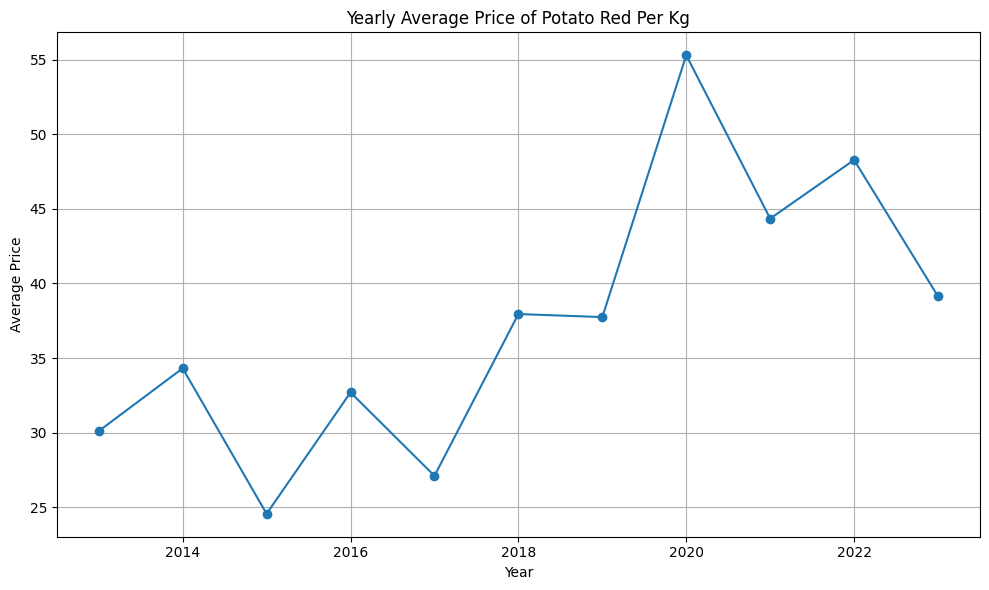

In [48]:
# Filter the DataFrame for "Potato Red" commodity
potato_red_df = df[df['Commodity'] == 'Potato Red']

# Group by year and month, calculate the average price for each month
monthly_avg_price = potato_red_df.groupby([potato_red_df['Date'].dt.year, potato_red_df['Date'].dt.month])['Average'].mean()

# Group by year, calculate the average price for each year
yearly_avg_price = monthly_avg_price.groupby(level=0).mean()

# Plot the yearly average prices
plt.figure(figsize=(10, 6))
yearly_avg_price.plot(marker='o', linestyle='-')
plt.title('Yearly Average Price of Potato Red Per Kg')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.tight_layout()
plt.show()


# Monthly Average Price of Potato Red



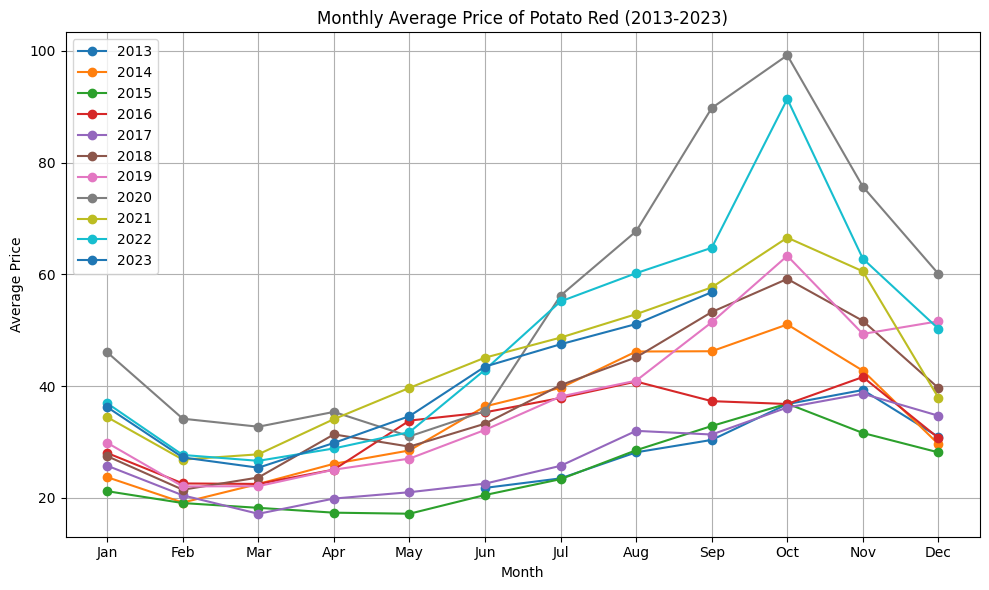

In [49]:
# Filter the DataFrame for "Potato Red" commodity and years 2013 to 2023
potato_red_df = df[(df['Commodity'] == 'Potato Red') & (df['Date'].dt.year.between(2013, 2023))]

# Group by year and month, calculate the average price for each month
monthly_avg_price = potato_red_df.groupby([potato_red_df['Date'].dt.year, potato_red_df['Date'].dt.month])['Average'].mean()

# Plot the monthly average prices for each year
plt.figure(figsize=(10, 6))
for year in range(2013, 2024):
    yearly_avg_price = monthly_avg_price.xs(year)
    plt.plot(yearly_avg_price.index, yearly_avg_price.values, marker='o', linestyle='-', label=year)

plt.title('Monthly Average Price of Potato Red (2013-2023)')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


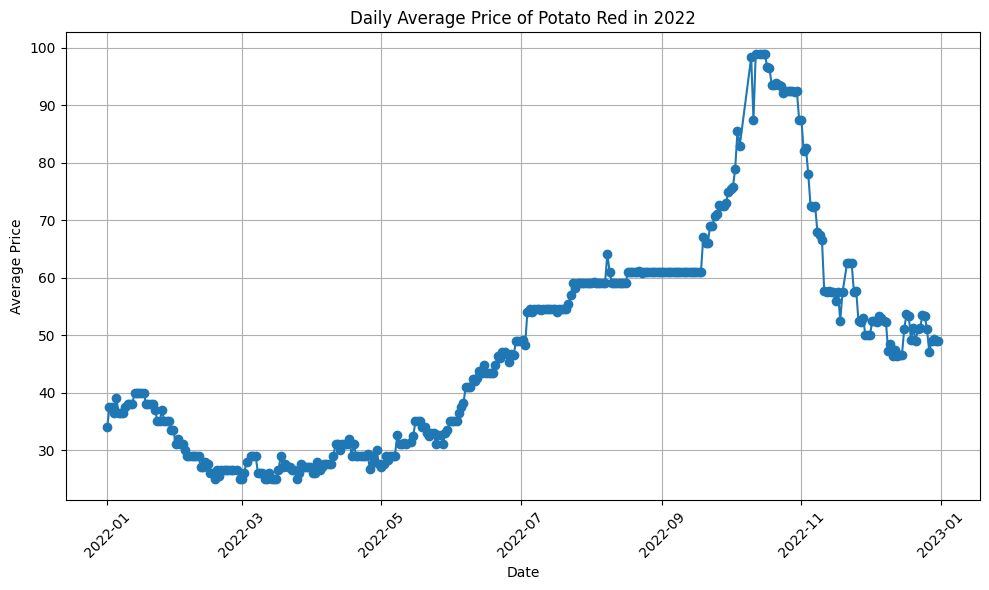

In [50]:
# Filter the DataFrame for "Potato Red" commodity and the year 2022
potato_red_2022_df = df[(df['Commodity'] == 'Potato Red') & (df['Date'].dt.year == 2022)]

# Group by date and calculate the average price for each day
daily_avg_price_2022 = potato_red_2022_df.groupby(potato_red_2022_df['Date'].dt.date)['Average'].mean()

# Plot the daily average prices for 2022
plt.figure(figsize=(10, 6))
plt.plot(daily_avg_price_2022.index, daily_avg_price_2022.values, marker='o', linestyle='-')
plt.title('Daily Average Price of Potato Red in 2022')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


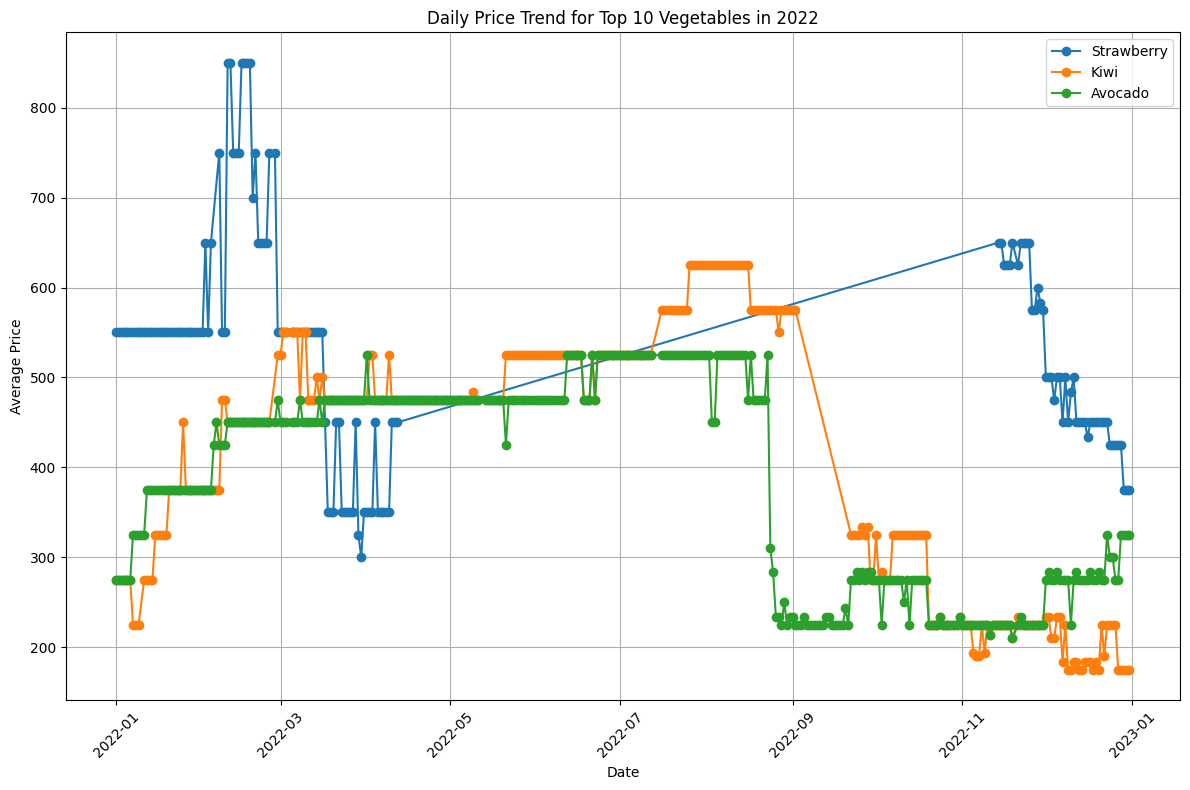

In [51]:
# Calculate the average price for each vegetable
average_price_per_vegetable = df.groupby('Commodity')['Average'].mean()

# Select the top 10 vegetables with the highest average prices
top_10_vegetables = average_price_per_vegetable.nlargest(3)

# Filter the DataFrame for the top 10 vegetables and the year 2022
top_10_df_2022 = df[(df['Commodity'].isin(top_10_vegetables.index)) & (df['Date'].dt.year == 2022)]

# Plot the daily trend for each of the top 10 vegetables in 2022
plt.figure(figsize=(12, 8))
for vegetable in top_10_vegetables.index:
    vegetable_data = top_10_df_2022[top_10_df_2022['Commodity'] == vegetable]
    daily_avg_price = vegetable_data.groupby(vegetable_data['Date'].dt.date)['Average'].mean()
    plt.plot(daily_avg_price.index, daily_avg_price.values, marker='o', label=vegetable)

plt.title('Daily Price Trend for Top 10 Vegetables in 2022')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Plot Monthly Average Price of Commodities

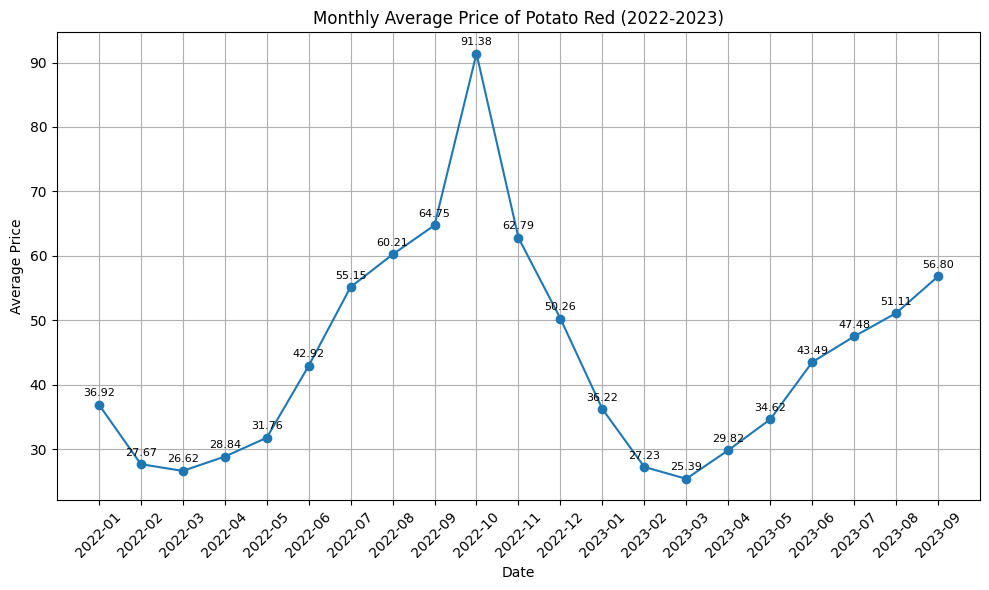

In [52]:
def plot_monthly_avg_price(df, commodity, start_year, end_year):
    # Filter the DataFrame for the specified commodity and years
    filtered_df = df[(df['Commodity'] == commodity) & (df['Date'].dt.year.between(start_year, end_year))]

    # Group by year and month, calculate the average price for each month
    monthly_avg_price = filtered_df.groupby([filtered_df['Date'].dt.year, filtered_df['Date'].dt.month])['Average'].mean()

    # Extract years and months from the monthly_avg_price index
    years_months = monthly_avg_price.index.tolist()
    years = [year_month[0] for year_month in years_months]
    months = [year_month[1] for year_month in years_months]

    # Create a list of dates
    dates = [f"{year}-{month:02}" for year, month in zip(years, months)]

    # Plot the monthly average prices
    plt.figure(figsize=(10, 6))
    plt.plot(dates, monthly_avg_price.values, marker='o', linestyle='-')
    plt.title(f'Monthly Average Price of {commodity} ({start_year}-{end_year})')
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()

    # Annotate each point with its corresponding value
    for date, value in zip(dates, monthly_avg_price.values):
        plt.text(date, value +1, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

    plt.show()


plot_monthly_avg_price(df, 'Potato Red', 2022, 2023)


## Calculate the monthly change in price for Commodities

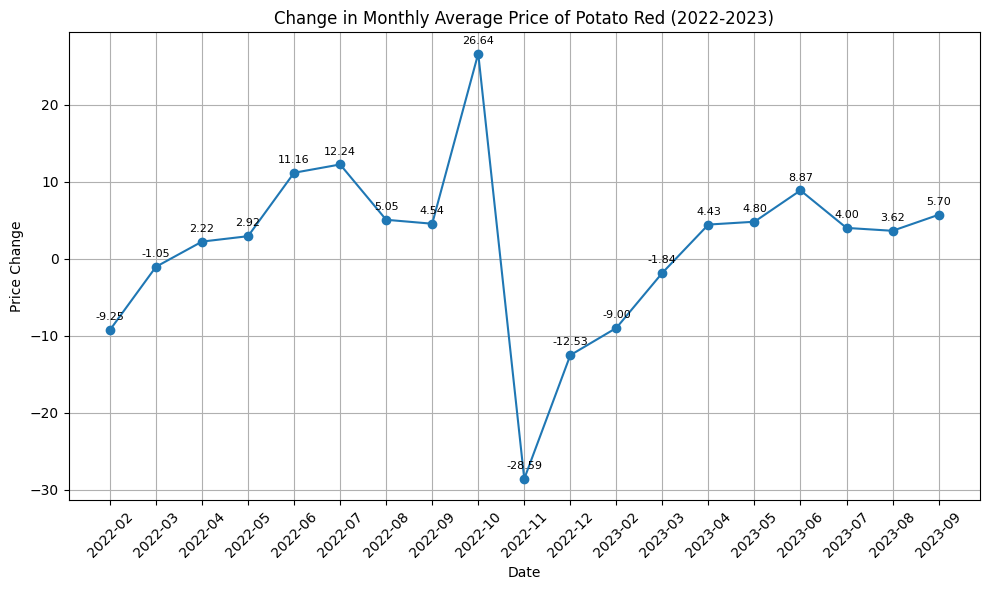

In [53]:
def plot_price_changes(df, commodity, start_year, end_year):
    # Filter the DataFrame for the specified commodity and years
    filtered_df = df[(df['Commodity'] == commodity) & (df['Date'].dt.year.between(start_year, end_year))]

    # Group by year and month, calculate the average price for each month
    monthly_avg_price = filtered_df.groupby([filtered_df['Date'].dt.year, filtered_df['Date'].dt.month])['Average'].mean()

    # Calculate the changes in average prices
    price_changes = {}
    for year in monthly_avg_price.index.levels[0]:
        year_avg_prices = monthly_avg_price.xs(year)
        for month in range(1, 13):
            if month in year_avg_prices.index:
                if month == 1:  # Skip January as there is no previous month in the same year
                    continue
                current_price = year_avg_prices[month]
                previous_price = year_avg_prices[month - 1]  # Get the price of the previous month
                price_changes[(year, month)] = current_price - previous_price

    # Extract years and months from the price_changes keys
    years = [date[0] for date in price_changes.keys()]
    months = [date[1] for date in price_changes.keys()]

    # Create a list of dates
    dates = [f"{year}-{month:02}" for year, month in zip(years, months)]

    # Plot the changes in average prices over time
    plt.figure(figsize=(10, 6))
    plt.plot(dates, price_changes.values(), marker='o', linestyle='-')
    plt.title(f'Change in Monthly Average Price of {commodity} ({start_year}-{end_year})')
    plt.xlabel('Date')
    plt.ylabel('Price Change')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()

    # Annotate each point with its corresponding value
    for date, value in zip(dates, price_changes.values()):
        plt.text(date, value + 1, f'{value:.2f}', ha='center', va='bottom', fontsize=8)  # Adjust the value by adding 1

    plt.show()


plot_price_changes(df, 'Potato Red', 2022, 2023)


# Commodities that were sold from 2019

In [54]:
commodities_before_2019 = set(df[df['Date'].dt.year < 2019]['Commodity'])
commodities_after_2019 = set(df[df['Date'].dt.year >= 2019]['Commodity'])

#Commodities Sold before 2019
commodity_difference_before_2019 = commodities_before_2019 - commodities_after_2019
commodity_difference_after_2019 = commodities_after_2019 - commodities_before_2019   #commodities sold  after 2019

print(f"Total number of Commodities Sold before 2019 is: {len(commodity_difference_before_2019)} and they are", commodity_difference_before_2019)
print(f"Total number of Commodities Sold after 2019 is: {len(commodity_difference_after_2019)} and they are", commodity_difference_after_2019)


Total number of Commodities Sold before 2019 is: 1 and they are {'Maize'}
Total number of Commodities Sold after 2019 is: 41 and they are {'Mango(Chousa)', 'Cucumber(Hybrid)', 'Avocado', 'Cabbage', 'Cowpea(Short)', 'Litchi(Indian)', 'Tomato Big(Indian)', 'Pointed Gourd(Terai)', 'Cauli Local(Jyapu)', 'Amla', 'Onion Dry (Chinese)', 'Fish Fresh(Mungari)', 'Kiwi', 'Mushroom(Button)', 'Chilli Green(Akbare)', 'French Bean(Hybrid)', 'Water Melon(Dotted)', 'French Bean(Rajma)', 'Sarifa', 'Fish Fresh(Chhadi)', 'Carrot(Terai)', 'Fish Fresh(Rahu)', 'Cabbage(Terai)', 'Grapes(Black)', 'Pear(Chinese)', 'Squash(Round)', 'Apple(Fuji)', 'Orange(Indian)', 'Potato Red(Indian)', 'Tomato Small(Tunnel)', 'Chilli Green(Bullet)', 'Chilli Green(Machhe)', 'Potato Red(Mude)', 'Tree Tomato', 'Papaya(Indian)', 'Tomato Small(Indian)', 'Mango(Dushari)', 'Fish Fresh(Bachuwa)', 'Mango(Calcutte)', 'Tomato Small(Terai)', 'Raddish White(Hybrid)'}


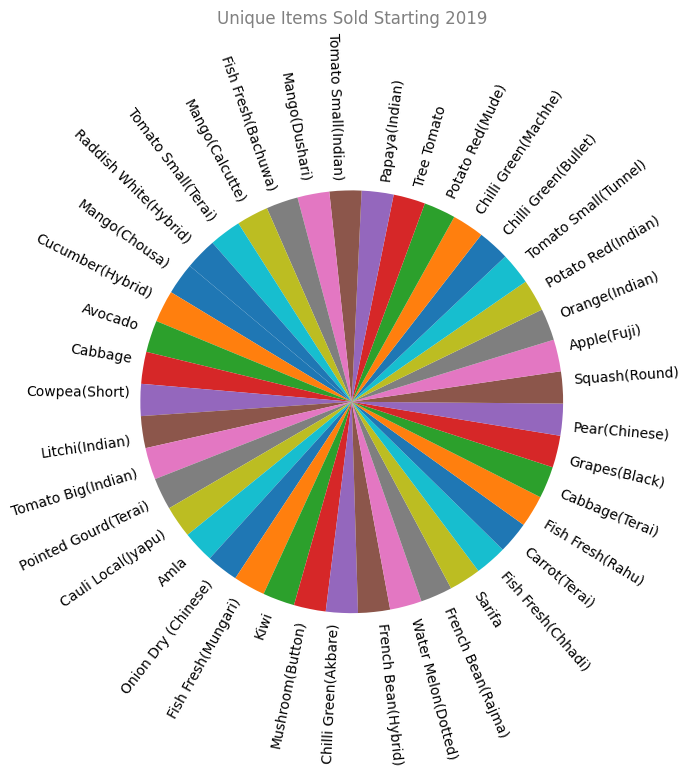

In [55]:
# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie([1] * len(commodity_difference_after_2019),
        labels=commodity_difference_after_2019,
        startangle=140,
        labeldistance=1.05,
        rotatelabels=True)
plt.axis("equal")
plt.title("Unique Items Sold Starting 2019", y=1.3, color="grey")

plt.show()

# Distribution of Commodities

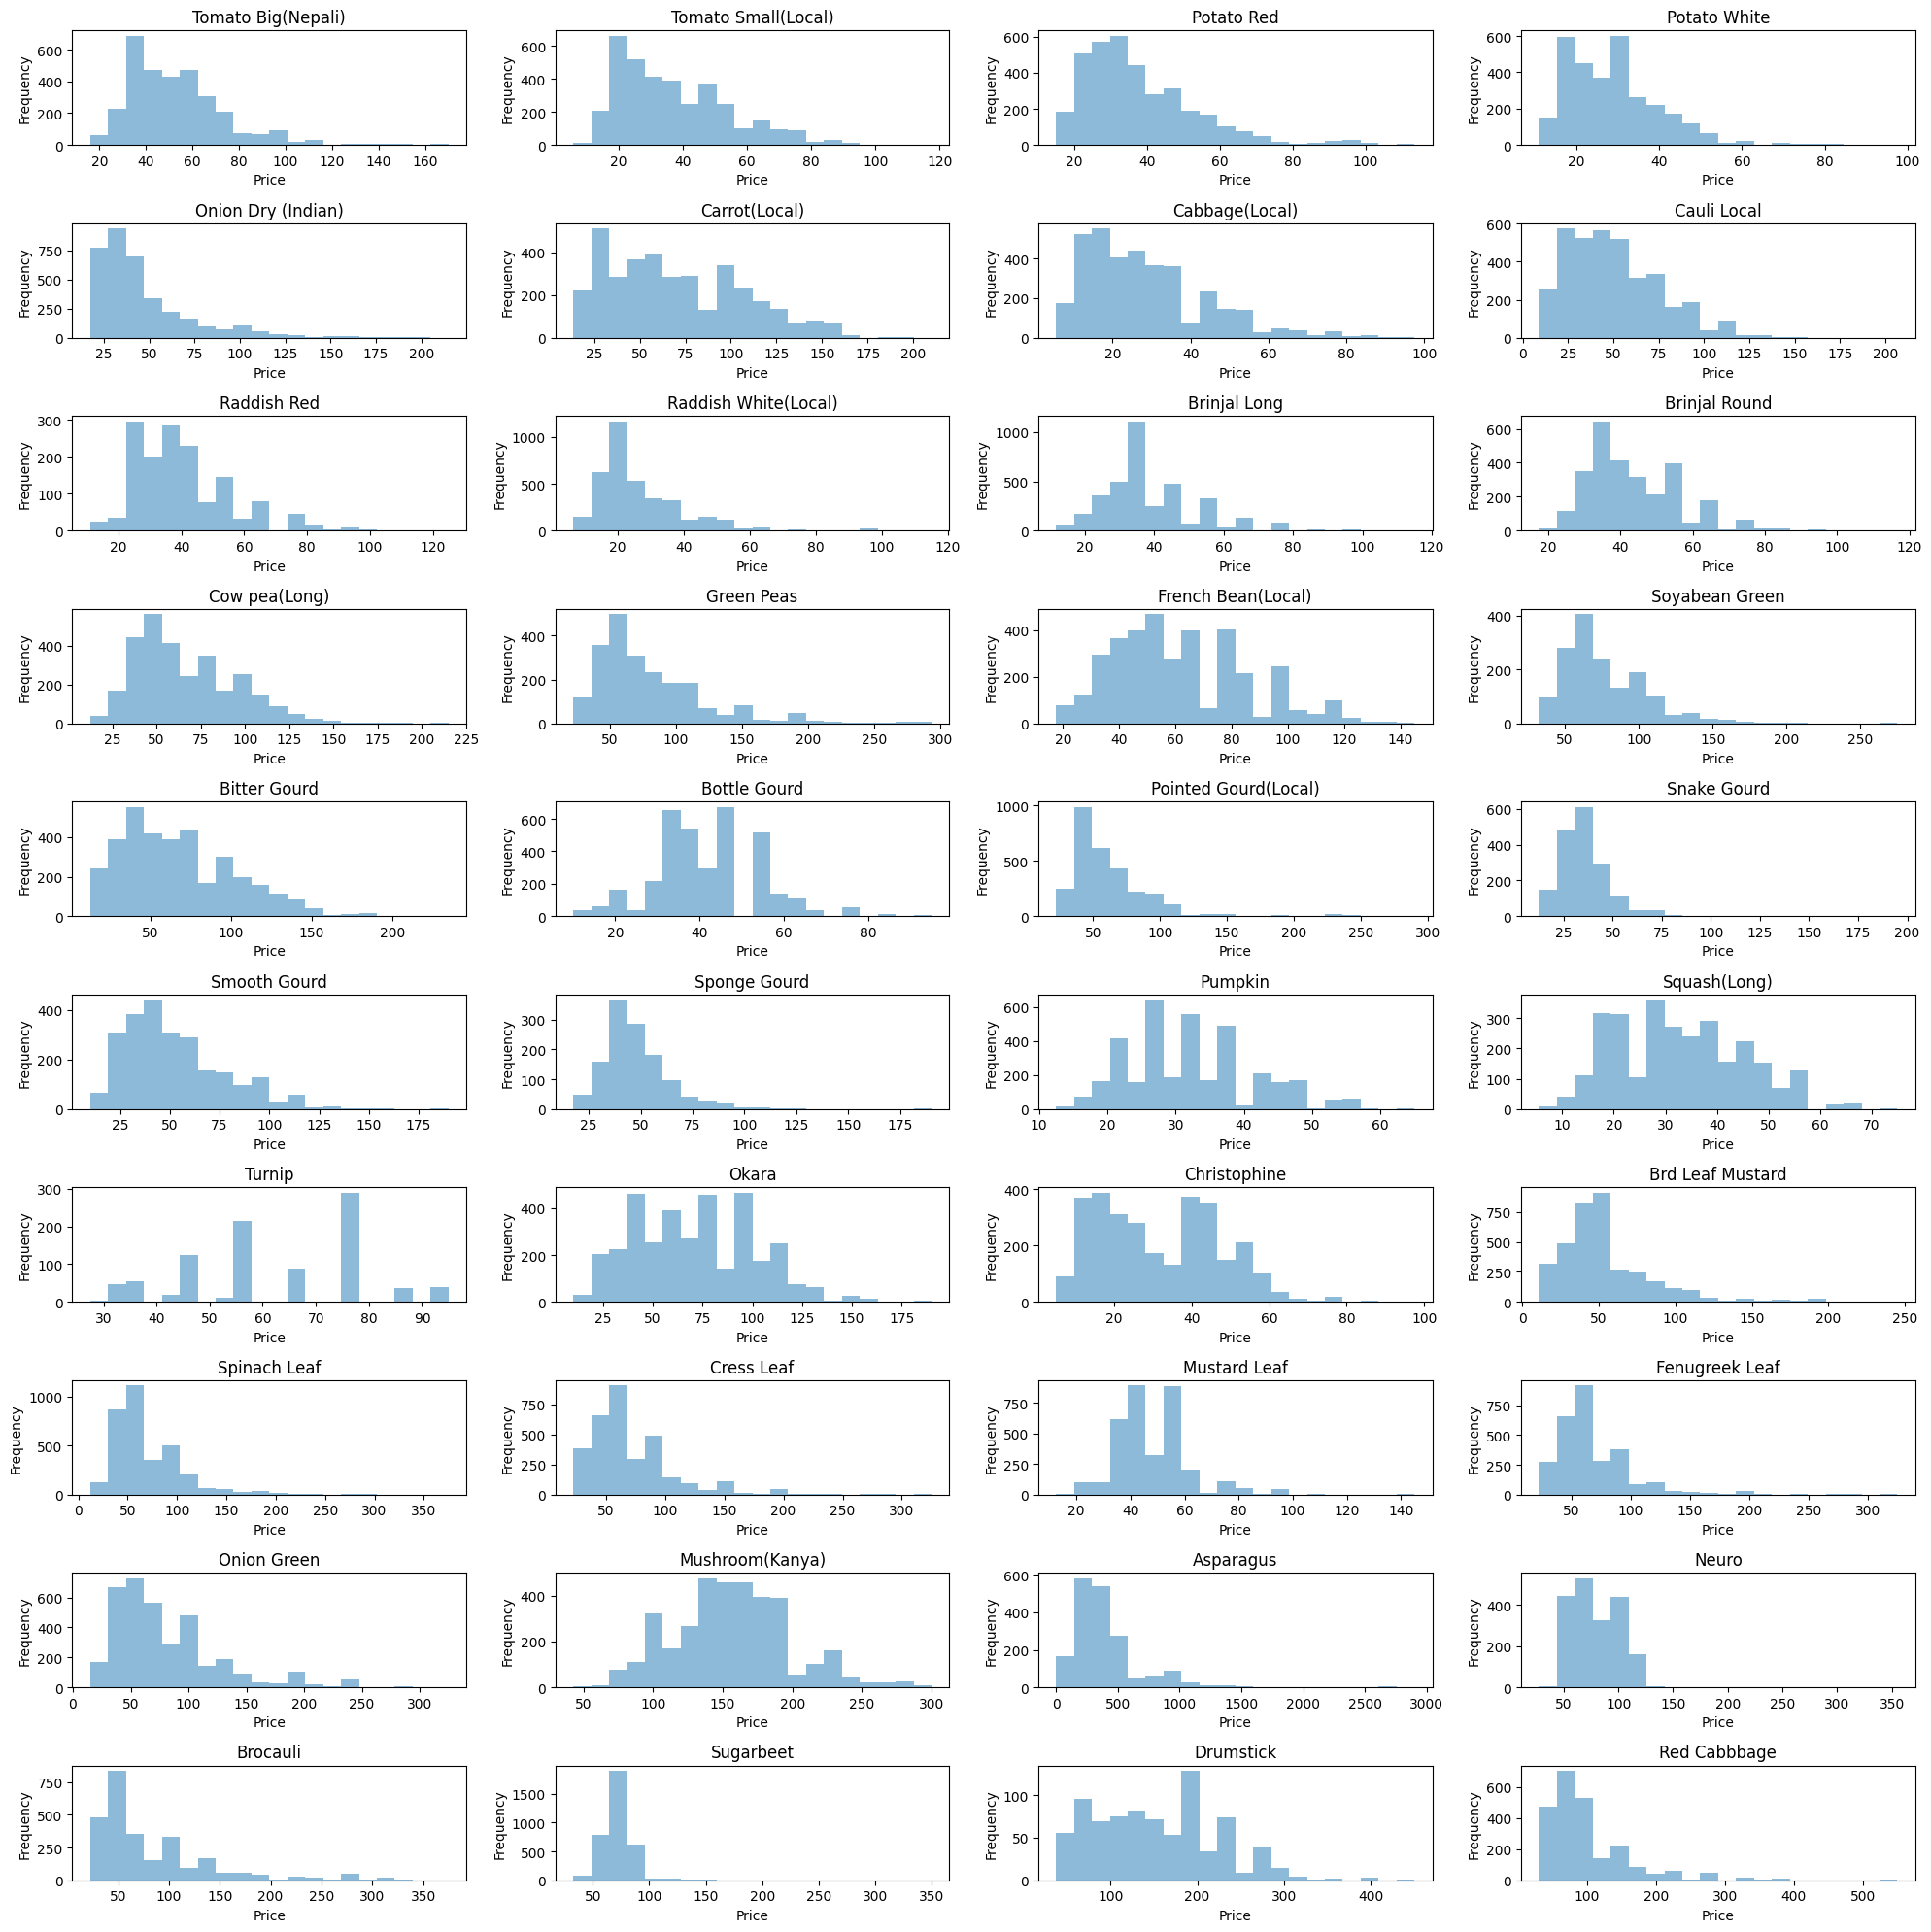

In [56]:
# Get unique commodities
unique_commodities = df['Commodity'].unique()

# Determine the number of rows and columns for subplots
num_rows = 10
num_cols = 4
num_plots = num_rows * num_cols

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Flatten the axs array for easy indexing
axs = axs.flatten()

# Plot histograms for each commodity
for i, commodity in enumerate(unique_commodities[:num_plots]):
    commodity_data = df[df['Commodity'] == commodity]['Average']
    axs[i].hist(commodity_data, bins=20, alpha=0.5)
    axs[i].set_title(commodity)
    axs[i].set_xlabel('Price')
    axs[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(num_plots, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


# Price Fluctuation Analysis

In [57]:
# Group by year and find the commodity with the highest average price for each year
most_expensive_commodities = df.groupby(df['Date'].dt.year).apply(lambda x: x.loc[x['Average'].idxmax()])

# Print the most expensive commodities for each year
print("Most Expensive Commodities of Each Year:")
print(most_expensive_commodities[['Date', 'Commodity', 'Average']])


Most Expensive Commodities of Each Year:
           Date         Commodity  Average
Date                                      
2013 2013-07-12              Lime   450.00
2014 2014-09-30              Lime   750.00
2015 2015-03-17         Asparagus   650.00
2016 2016-08-25          Parseley   850.00
2017 2017-09-22              Lime   725.00
2018 2018-03-21              Lime  1475.00
2019 2019-10-06  Mushroom(Button)   845.00
2020 2020-10-22         Asparagus  1900.00
2021 2021-11-16         Asparagus  2900.00
2022 2022-03-01         Asparagus  1450.00
2023 2023-02-05         Asparagus   999.99


This gives the most expensive commodities of the year. In 2023 Lime was the expensive commodities but moving on Asparagus has become the most expensive commodity with the average price of 999 in year 2023.

In [58]:
#Function to get the top Commodities for a given year
def top_commodities_by_year(df, year, top_n):
    # Filter the DataFrame for the specified year
    df_year = df[df['Date'].dt.year == year]

    # Calculate the average price for each Commodities
    average_price_per_commodities = df_year.groupby('Commodity')['Average'].mean()

    # Select the top Commodities with the highest average prices
    top_commodities = average_price_per_commodities.nlargest(top_n)

    print(f"Top commodities for {year}:")

    return top_commodities

# Call the function to get the top Commodities for the year 2023
top_10_commodities_2023 = top_commodities_by_year(df, 2023, top_n=10)
print(top_10_commodities_2023)


Top commodities for 2023:
Commodity
Kiwi                513.128812
Avocado             460.439777
Chilli Dry          459.987593
Strawberry          354.516412
Grapes(Black)       346.317162
Asparagus           345.165338
Fish Fresh(Rahu)    341.357407
Mushroom(Button)    330.409438
Pomegranate         323.862677
Parseley            312.089504
Name: Average, dtype: float64


Here we find the Top Commodities of the specific year.First we get the average price of each commodities and select the top commodities with highest average value. It shows that Kiwi is the most expensive commodities in 2023.

In [59]:
# Define a function to find the top expensive commodities for each year
def top_expensive_commodities_yearwise(df, n_top):
    # Group by year and commodity, and calculate the mean price for each commodity for each year
    yearly_commodity_mean_prices = df.groupby([df['Date'].dt.year, 'Commodity'])['Average'].mean()

    # Initialize an empty DataFrame to store the top three commodities for each year
    top_three_expensive_commodities_yearwise = pd.DataFrame(columns=['Year', 'Commodity', 'Average'])

    # Iterate over each year and find the top three commodities with the highest average prices
    for year in df['Date'].dt.year.unique():
        year_data = yearly_commodity_mean_prices.loc[year]
        top_three_year = year_data.nlargest(n_top).reset_index()
        top_three_year['Year'] = year
        top_three_expensive_commodities_yearwise = pd.concat([top_three_expensive_commodities_yearwise, top_three_year])

    return top_three_expensive_commodities_yearwise

# Call the function to get the top three expensive commodities for each year
top_three_expensive_commodities_yearwise = top_expensive_commodities_yearwise(df, n_top = 3)

# Print the top three unique commodities with the highest average prices for each year
print("Top Three Unique Commodities with the Highest Average Prices for Each Year:")
print(top_three_expensive_commodities_yearwise)


Top Three Unique Commodities with the Highest Average Prices for Each Year:
   Year           Commodity     Average
0  2013                Lime  345.859873
1  2013       Grapes(Green)  229.519231
2  2013          Fish Fresh  223.365385
0  2014                Lime  401.785714
1  2014           Asparagus  246.984127
2  2014         Pomegranate  239.360841
0  2015                Lime  462.097701
1  2015           Asparagus  291.344221
2  2015          Strawberry  271.666667
0  2016                Lime  424.986264
1  2016           Asparagus  315.368098
2  2016  Garlic Dry Chinese  292.589286
0  2017                Lime  526.842776
1  2017           Asparagus  357.978723
2  2017  Garlic Dry Chinese  250.672805
0  2018           Asparagus  450.000000
1  2018                Lime  313.881215
2  2018          Fish Fresh  249.586777
0  2019    Mushroom(Button)  438.436019
1  2019         Apple(Fuji)  306.379310
2  2019           Asparagus  295.000000
0  2020          Strawberry  499.342105
1  2

This gives the Top Three Unique Commodities with the Highest Average Prices for Each Year.

## Price variation of each commodities for each year

Here we define the function to calculate the price variation of all the commodities for each year.

In [60]:
# Define a function to calculate price variation for each year for all commodities
def price_variation_by_year(df):
    # Group the DataFrame by year and commodity
    grouped = df.groupby([df['Date'].dt.year, 'Commodity'])

    # Initialize an empty list to store results
    result_data = []

    # Iterate over each group
    for (year, commodity), data in grouped:
        # Calculate the price variation for the commodity within the year
        price_variation = data['Average'].max() - data['Average'].min()
        # Append the result to the result data list
        result_data.append({'Year': year, 'Commodity': commodity, 'Price Variation': price_variation})

    # Convert the result data to a DataFrame
    result_df = pd.DataFrame(result_data)

    return result_df

# Call the function to get price variation for each year for all commodities
price_variation_by_year_df = price_variation_by_year(df)

# Print the result DataFrame
print("Price Variation for Each Year for All Commodities:")
print(price_variation_by_year_df)


Price Variation for Each Year for All Commodities:
      Year            Commodity  Price Variation
0     2013        Apple(Jholey)            90.00
1     2013                 Arum            24.50
2     2013            Asparagus           265.00
3     2013               Bakula            47.50
4     2013         Bamboo Shoot           252.50
...    ...                  ...              ...
1175  2023               Turnip            50.00
1176  2023             Turnip A            41.67
1177  2023  Water Melon(Dotted)             5.83
1178  2023   Water Melon(Green)            62.33
1179  2023                  Yam            80.00

[1180 rows x 3 columns]


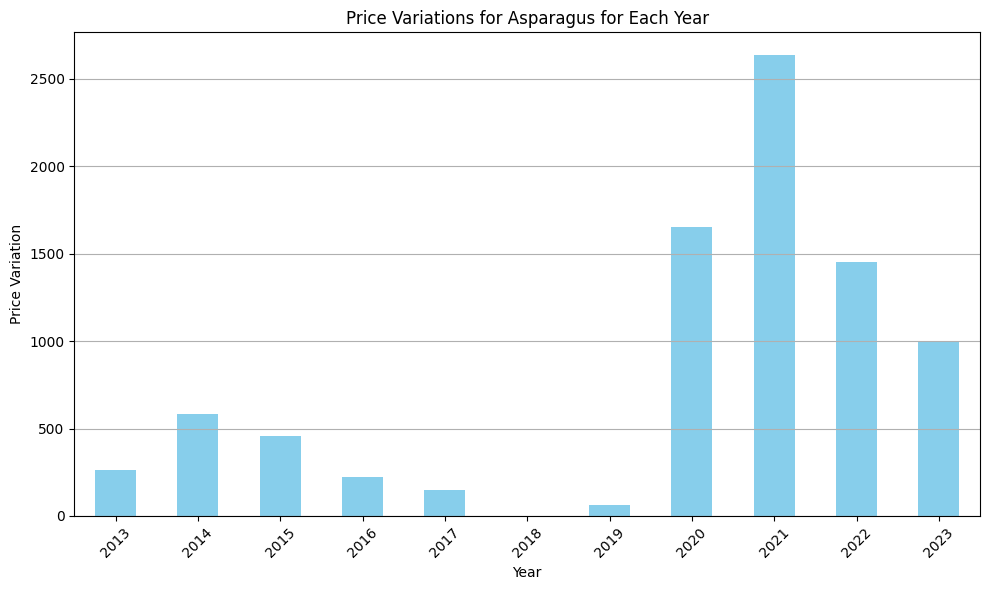

In [61]:
import matplotlib.pyplot as plt

def plot_variation_bar(df, commodity):

    # Filter the DataFrame for the specified commodity
    commodity_df = df[df['Commodity'] == commodity]

    # Group by year and calculate the price variation (difference between maximum and minimum prices) for each year
    price_variation_by_year = commodity_df.groupby(commodity_df['Date'].dt.year)['Average'].apply(lambda x: x.max() - x.min())

    # Plot the price variations for the specified commodity for each year
    plt.figure(figsize=(10, 6))
    price_variation_by_year.plot(kind='bar', color='skyblue')
    plt.title(f'Price Variations for {commodity} for Each Year')
    plt.xlabel('Year')
    plt.ylabel('Price Variation')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Example usage:
plot_variation_bar(df, 'Asparagus')


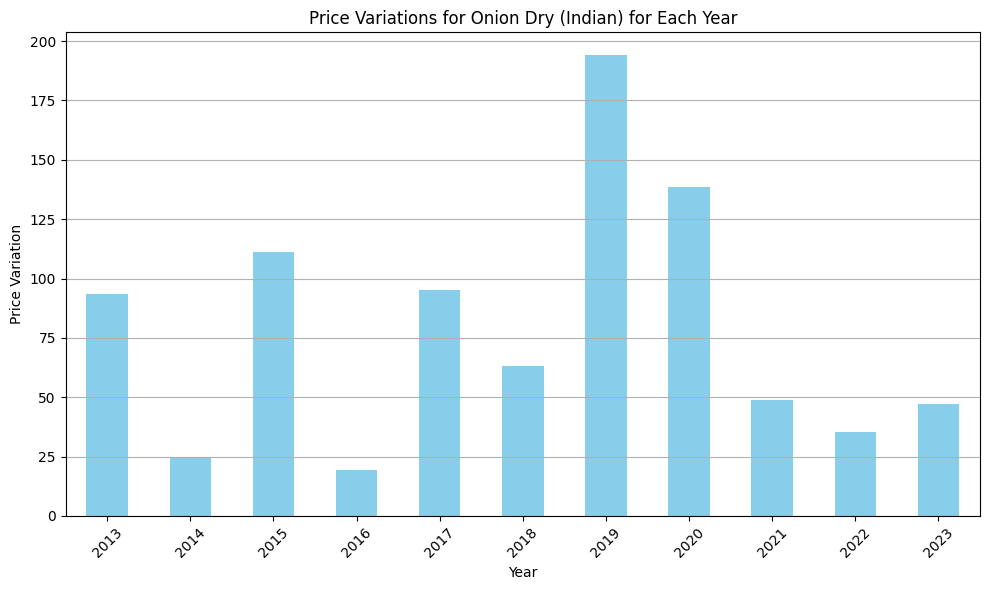

In [62]:
# Example usage:
plot_variation_bar(df, 'Onion Dry (Indian)')

In [63]:
# Filter the DataFrame for Asparagus in the year 2018
asparagus_2018_df = df[(df['Commodity'] == 'Asparagus') & (df['Date'].dt.year == 2021)]

# Print the rows for Asparagus in the year 2018
print("Rows for Asparagus in the year 2018:")
print(asparagus_2018_df)


Rows for Asparagus in the year 2018:
        Commodity       Date Unit  Minimum  Maximum  Average
186642  Asparagus 2021-01-28   Kg    250.0    280.0    265.0
190085  Asparagus 2021-03-05   Kg    900.0   1000.0    950.0
190189  Asparagus 2021-03-06   Kg    900.0   1000.0    950.0
190293  Asparagus 2021-03-07   Kg    900.0   1000.0    950.0
190398  Asparagus 2021-03-08   Kg    900.0   1000.0    950.0
...           ...        ...  ...      ...      ...      ...
217192  Asparagus 2021-12-18   Kg   1300.0   1400.0   1350.0
217306  Asparagus 2021-12-19   Kg   1400.0   1500.0   1450.0
217413  Asparagus 2021-12-20   Kg   1400.0   1500.0   1450.0
217525  Asparagus 2021-12-21   Kg   1400.0   1500.0   1450.0
217744  Asparagus 2021-12-23   Kg   1800.0   2000.0   1900.0

[288 rows x 6 columns]


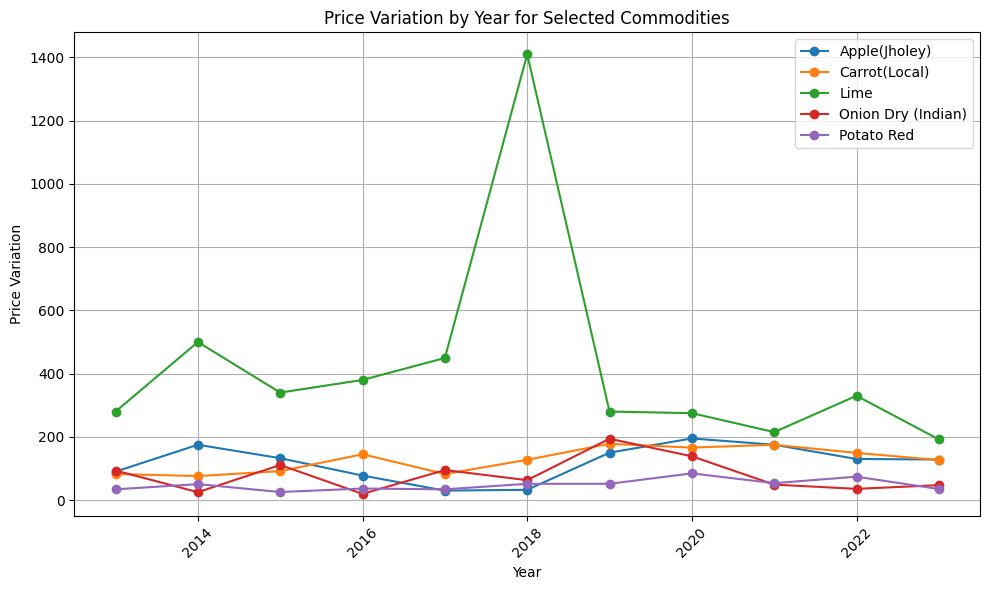

In [64]:
# Define the list of commodities
commodities_list = ['Lime', 'Potato Red', 'Apple(Jholey)', 'Onion Dry (Indian)', 'Carrot(Local)']

# Filter the price_variation_by_year_df DataFrame to include only the commodities from the list
filtered_price_variation_df = price_variation_by_year_df[price_variation_by_year_df['Commodity'].isin(commodities_list)]

# Plot the price variations for each commodity over the years using a line graph
plt.figure(figsize=(10, 6))
for commodity in filtered_price_variation_df['Commodity'].unique():
    commodity_data = filtered_price_variation_df[filtered_price_variation_df['Commodity'] == commodity]
    plt.plot(commodity_data['Year'], commodity_data['Price Variation'], marker='o', label=commodity)

plt.title('Price Variation by Year for Selected Commodities')
plt.xlabel('Year')
plt.ylabel('Price Variation')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


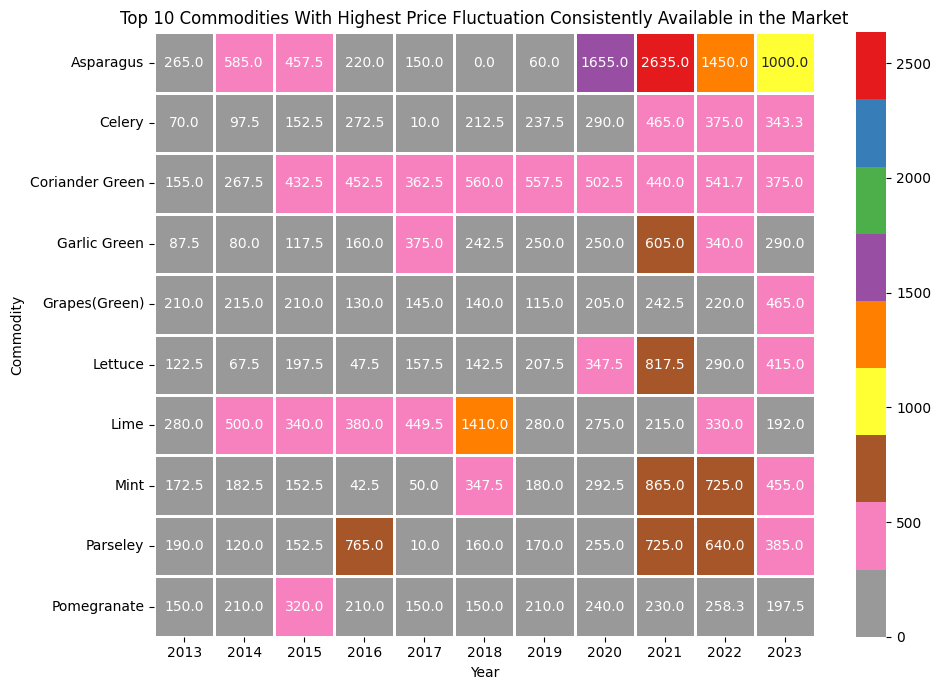

In [65]:
import seaborn as sns

plt.figure(figsize=(10, 7))

# Sort the DataFrame by 'Price Variation' in descending order and select the top 10 commodities
top_10_commodities = price_variation_by_year_df.groupby('Commodity')['Price Variation'].sum().nlargest(10)

# Filter the DataFrame to include only the top 10 commodities
filtered_df = price_variation_by_year_df[price_variation_by_year_df['Commodity'].isin(top_10_commodities.index)]

# Pivot the DataFrame to the appropriate format
pivot_df = filtered_df.pivot_table(index="Commodity", columns="Year", values="Price Variation")

# Plot heatmap
sns.heatmap(pivot_df,
            linewidths=1,
            cmap='Set1_r',
            annot=True,
            fmt=".1f")

plt.ylabel("Commodity")
plt.xlabel("Year")
plt.title("Top 10 Commodities With Highest Price Fluctuation Consistently Available in the Market")
plt.tight_layout()
plt.show()


#Seasonal Analysis

In [66]:
df.head()

,Commodity,Date,Unit,Minimum,Maximum,Average
0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5
3,Potato White,2013-06-16,Kg,15.0,16.0,15.5
4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0


In [67]:
import calendar

# Extract year, month, and day components
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Map month numbers to month names
df['Month'] = df['Month'].apply(lambda x: calendar.month_name[x])

# Map day numbers to day names
df['Day'] = df['Date'].dt.day_name()

In [68]:
df.head()

,Commodity,Date,Unit,Minimum,Maximum,Average,Year,Month,Day
0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5,2013,June,Sunday
1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0,2013,June,Sunday
2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5,2013,June,Sunday
3,Potato White,2013-06-16,Kg,15.0,16.0,15.5,2013,June,Sunday
4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0,2013,June,Sunday
